## EEP 502: Analytical Methods for Electrical Engineering
    
# Final project
## Due December 14, 2024 at 11:59 PM
Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand-alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas.
- Comment your code as necessary, with a description of what each function does, and all major steps.
- Label plots axes, use legends, and use plot titles.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

<span style="color: red'">
Although you may discuss the project with others, you must turn in your own, original work.
</span>


In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network.

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$.

In [2]:
def nonlinearity_func(x):
    return ((1/(1+np.exp(-x))) - (1/2))

In [3]:
def neuron_firing_rate_func(t,weight_vector_i,neuron_firing_rate_vector_i,neuron_bias_i):
    """Function is a realistic model of a neuron's firing rate in a biological system.


    Interface Control Document (ICD)
    | I/O       | Signal Name                   | Description                                                                                                                       |
    | -         | -                             | -                                                                                                                                 |
    | input     | weight_vector_i               | Vector of real numbers, of size $n$ neurons, that defines the strength (weight) of connections between neurons $j$ and neuron $i$ |
    | input     | neuron_firing_rate_vector_i   | Vector of real numbers, of size $n$ neurons, that models firing rate for each neuron $j$ in the neural network.                   |
    | input     | neuron_bias_i                 | Real number that adjusts neuron $i$'s activation threshold                                                                        |
    | input     | t                             | time variable                                                                                                                     |
    | output    | g_x                           | Real number that models firing rate of neuron $i$ in a neural network                                                             |


    Exception Handling
    | Exception                                     | Description                                | Resolution                                                                      |
    | -                                             | -                                          | -                                                                               |
    """
    # Calculate the weighted sum of neuron firing rates into neuron $i$
    x = np.dot(weight_vector_i,neuron_firing_rate_vector_i) + neuron_bias_i

    # Nonlinearity function g(x) models the activation of neuron x_i
    return nonlinearity_func(x)

In [4]:
def ring_oscillator(weight_matrix_i,
                    init_neuron_firing_rate_vector_i,
                    time_steps_i,
                    neuron_bias_i,    
                    t_eval_i
                    ):
    """Function is a realistic model of a neuron's firing rate in a biological system.


    Interface Control Document (ICD)
    | I/O       | Signal Name                   | Description                                                                                                                       |
    | -         | -                             | -                                                                                                                                 |
    | input     | weight_matrix_i               | Vector of real numbers, of size $n$ neurons, that defines the strength (weight) of connections between neurons $j$ and neuron $i$ |
    | input     | neuron_firing_rate_vector_i   | Vector of real numbers, of size $n$ neurons, that models firing rate for each neuron $j$ in the neural network.                   |
    | input     | neuron_bias_i                 | Real number that adjusts neuron $i$'s activation threshold                                                                        |
    | input     | t                             | time variable                                                                                                                     |
    | output    | g_x                           | Real number that models firing rate of neuron $i$ in a neural network                                                             |
    """

    # Use scipy solve_ivp to solve ODE equations. Use default method: RK45
    xi_activation_rate =    spi.solve_ivp(
                            lambda t,x : neuron_firing_rate_func(t,weight_matrix_i,x,neuron_bias_i),
                            time_steps_i,
                            init_neuron_firing_rate_vector_i,
                            "RK45",
                            t_eval_i
                            )
    return xi_activation_rate.t,xi_activation_rate.y

In [5]:
# Setup initial conditions to model ring oscillator

# Initializing weighted matrix
W_ring_osc = np.array([
                [1,2,0],
                [0,1,2],
                [2,0,1]
])
W_ring_osc = (W_ring_osc*(-1))
# Initializing activation bias
b = np.zeros(3)
# Setting timestep range for ODE func
time_steps = [0,40]
# Initializing neuron firing rates for all neurons in the neural network to a random real number between 0 Hz and 150 Hz. 150Hz appears to be a reasonable maximum for neural firing rates.
# The animal is not specified, but assuming brain activity observations are on humans, based on the surronding article context.
# Wikipedia. [Neural oscillation]. Wikipedia. [Online]. Available: https://en.wikipedia.org/wiki/Neural_oscillation (Accessed: Dec. 7, 2024).
init_neuron_firing_rate_vector = np.array([random.uniform(0, 1) for i in range(3)]).reshape(3,)
# Setting up evaluation points for ODE func
t_eval = np.linspace(0, 40, 200)


W_ring_osc, init_neuron_firing_rate_vector,b

(array([[-1, -2,  0],
        [ 0, -1, -2],
        [-2,  0, -1]]),
 array([0.45378798, 0.32900941, 0.88473929]),
 array([0., 0., 0.]))

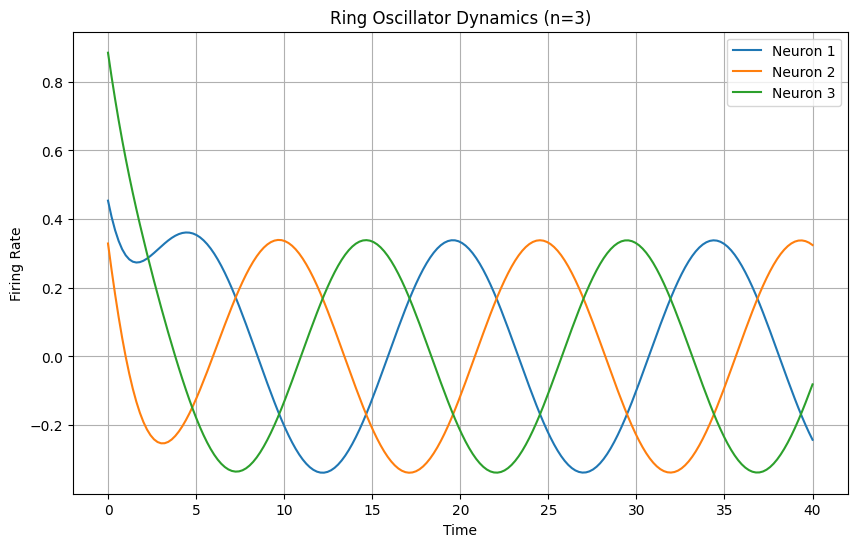

In [6]:
t,y = ring_oscillator(W_ring_osc,init_neuron_firing_rate_vector,time_steps,b,t_eval)
# Plot the results
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(t, y[i], label=f"Neuron {i+1}")
plt.title("Ring Oscillator Dynamics (n=3)")
plt.xlabel("Time")
plt.ylabel("Firing Rate")
plt.legend()
plt.grid()
plt.show()

[0.16500546 0.09802866 0.62523176]
<class 'numpy.ndarray'> (3,)


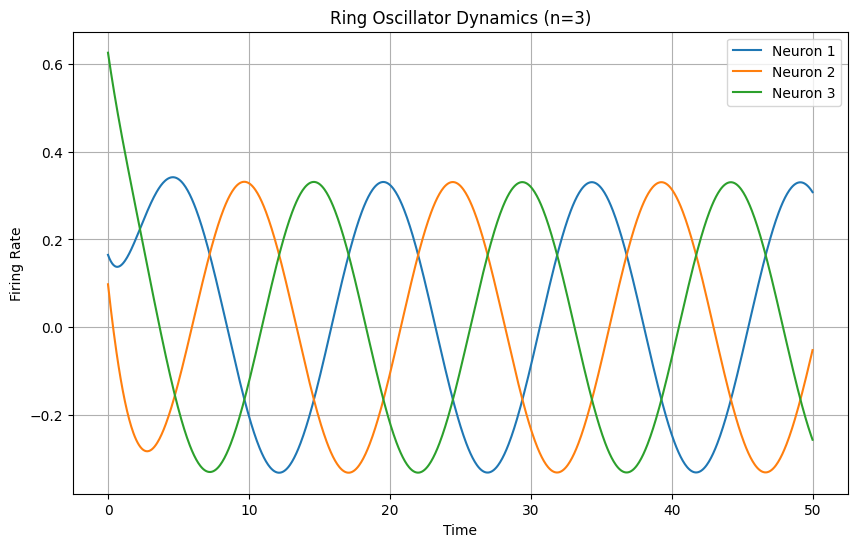

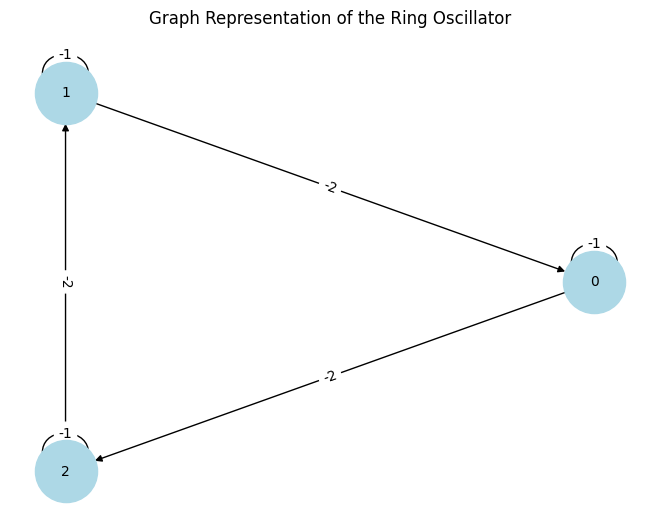

In [7]:
# Define the nonlinearity g(x)
def g(x):
    return 1 / (1 + np.exp(-x)) - 0.5

# Define the dynamics of the system
def ring_oscillator(t, x, W, b):
    return g(W @ x + b)

# Function to simulate the system
def simulate_ring_oscillator(W, b, t_span, x0, t_eval):
    print(type(x0),x0.shape)
    # Solve the differential equation
    sol = spi.solve_ivp(
        fun=lambda t, x: ring_oscillator(t, x, W, b),
        t_span=t_span,
        y0=x0,
        t_eval=t_eval,
        method="RK45"
    )
    return sol.t, sol.y

# Define the weight matrix W for n=3
W = -np.array([[1, 2, 0],
               [0, 1, 2],
               [2, 0, 1]])
b = np.zeros(3)  # Bias vector
t_span = (0, 50)  # Time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points to evaluate
x0 = np.random.rand(3)  # Initial state (random)

# Simulate the ring oscillator for n=3
print(x0)
t, x = simulate_ring_oscillator(W, b, t_span, x0, t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(t, x[i], label=f"Neuron {i+1}")
plt.title("Ring Oscillator Dynamics (n=3)")
plt.xlabel("Time")
plt.ylabel("Firing Rate")
plt.legend()
plt.grid()
plt.show()

# Draw the graph representation of the ring oscillator
def draw_ring_graph(W):
    G = nx.DiGraph()
    n = W.shape[0]
    for i in range(n):
        for j in range(n):
            if W[i, j] != 0:
                G.add_edge(j, i, weight=W[i, j])
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph Representation of the Ring Oscillator")
    plt.show()

draw_ring_graph(W)


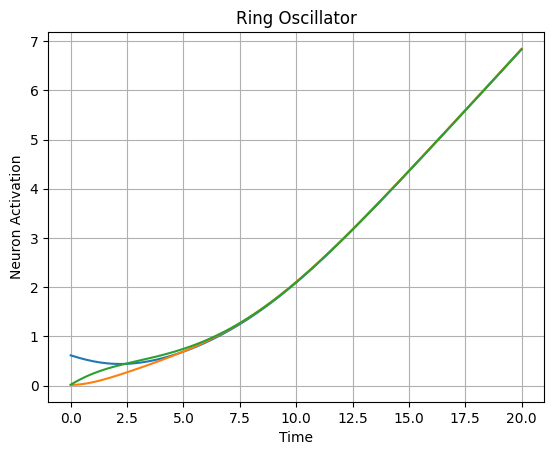

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def ring_oscillator(W, b, x0, dt, T):
  """Simulates a ring oscillator neural network.

  Args:
    W: Weight matrix.
    b: Bias vector.
    x0: Initial state vector.
    dt: Time step.
    T: Total simulation time.

  Returns:
    A tuple (t, x), where t is the time array and x is the state matrix.
  """

  t = np.arange(0, T+dt, dt)
  x = np.zeros((len(t), len(x0)))
  x[0] = x0

  for i in range(1, len(t)):
    x_dot = g(np.dot(W, x[i-1]) + b)
    x[i] = x[i-1] + dt * x_dot

  return t, x

def g(x):
  """Nonlinear activation function."""
  return 1 / (1 + np.exp(-x)) - 0.5

# Define the ring oscillator parameters
W = np.array([[-1, 2, 0],
              [0, -1, 2],
              [2, 0, -1]])
b = np.zeros(3)
x0 = np.random.rand(3)  # Initial state
dt = 0.1
T = 20

# Simulate the ring oscillator
t, x = ring_oscillator(W, b, x0, dt, T)

# Plot the results
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Neuron Activation')
plt.title('Ring Oscillator')
plt.grid(True)
plt.show()

Simulating for n = 3...


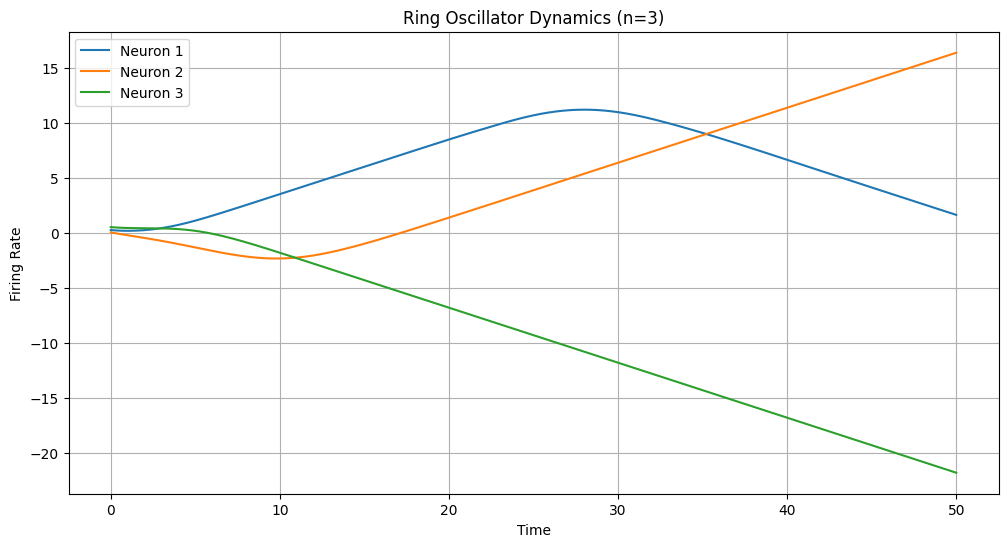

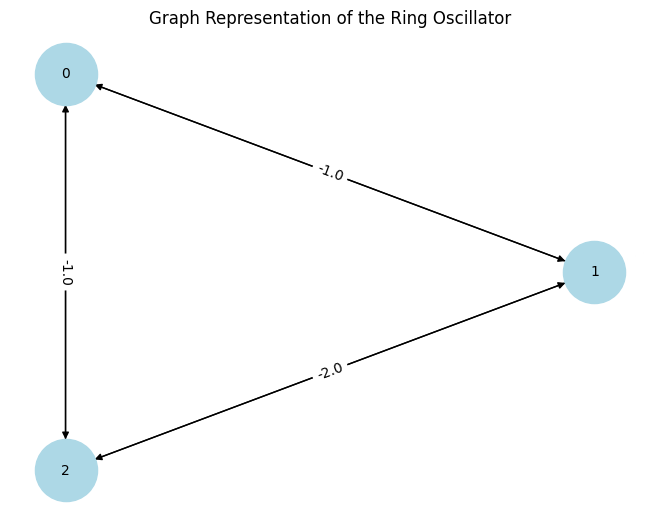

Simulating for n = 4...


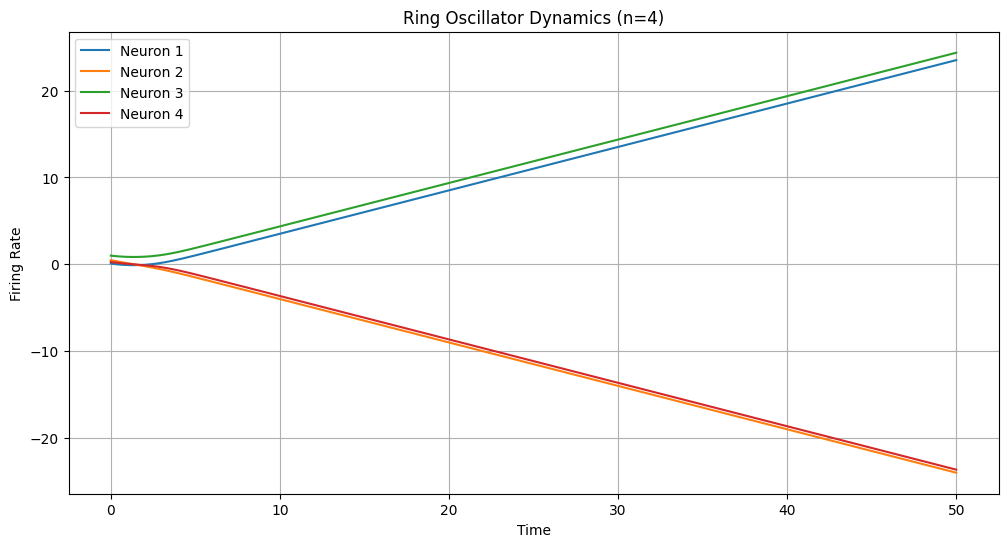

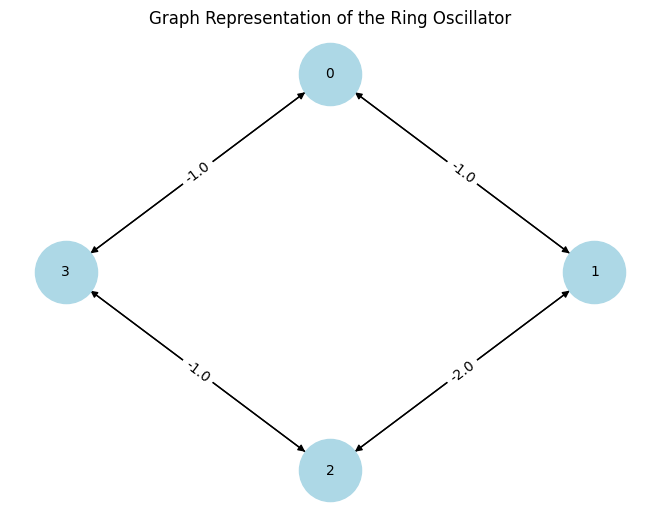

Simulating for n = 5...


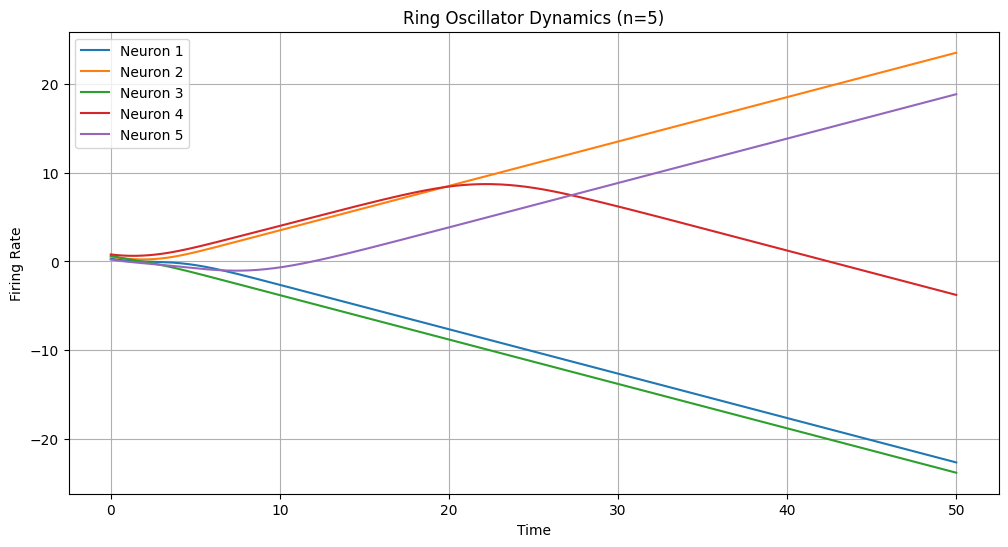

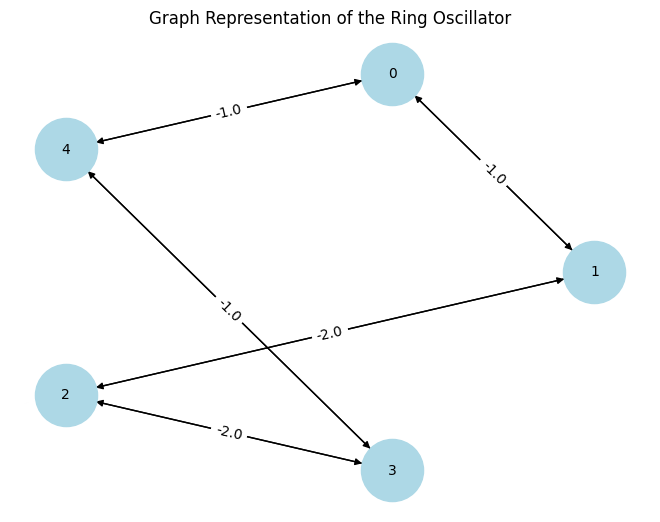

Simulating for n = 6...


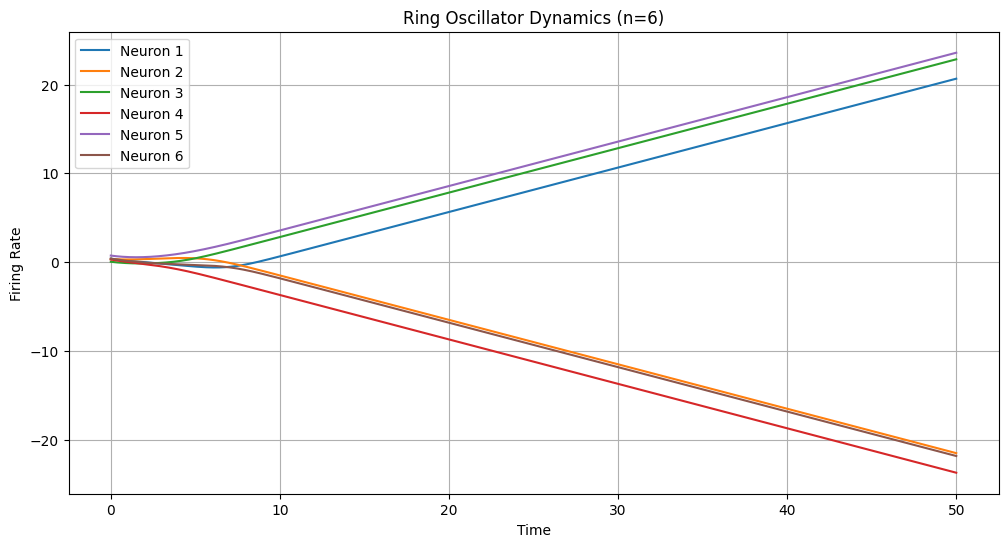

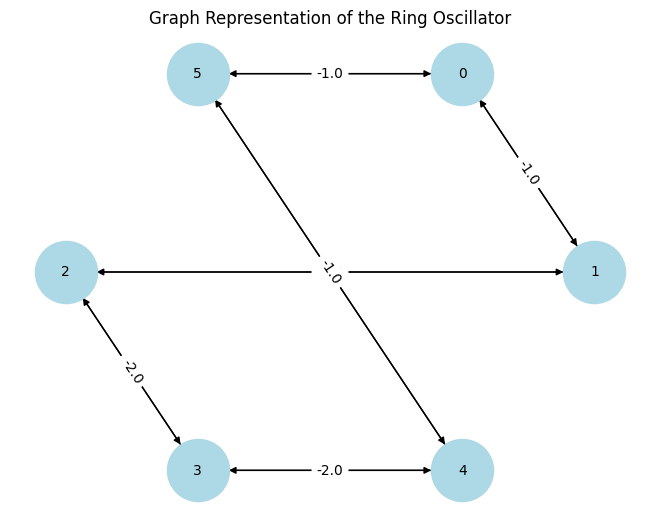

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import networkx as nx

# Define the nonlinearity g(x)
def g(x):
    return 1 / (1 + np.exp(-x)) - 0.5

# Define the dynamics of the system
def ring_oscillator(t, x, W, b):
    return g(W @ x + b)

# Function to simulate the system
def simulate_ring_oscillator(W, b, t_span, x0, t_eval):
    sol = solve_ivp(
        fun=lambda t, x: ring_oscillator(t, x, W, b),
        t_span=t_span,
        y0=x0,
        t_eval=t_eval,
        method="RK45"
    )
    return sol.t, sol.y

# Function to construct a ring weight matrix for given n
def construct_ring_matrix(n):
    W = np.zeros((n, n))
    for i in range(n):
        W[i, (i+1) % n] = 2  # Connect to the next neuron (clockwise)
        W[i, (i-1) % n] = 1  # Connect to the previous neuron (counterclockwise)
    return -W

# Simulate and plot results for arbitrary n
def simulate_and_plot(n, t_span=(0, 50), t_eval=np.linspace(0, 50, 1000)):
    W = construct_ring_matrix(n)
    b = np.zeros(n)  # Bias vector
    x0 = np.random.rand(n)  # Initial state (random)
    
    # Simulate the dynamics
    t, x = simulate_ring_oscillator(W, b, t_span, x0, t_eval)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.plot(t, x[i], label=f"Neuron {i+1}")
    plt.title(f"Ring Oscillator Dynamics (n={n})")
    plt.xlabel("Time")
    plt.ylabel("Firing Rate")
    plt.legend()
    plt.grid()
    plt.show()

    # Draw the graph representation
    draw_ring_graph(W)

# Draw the graph representation of the ring oscillator
def draw_ring_graph(W):
    G = nx.DiGraph()
    n = W.shape[0]
    for i in range(n):
        for j in range(n):
            if W[i, j] != 0:
                G.add_edge(j, i, weight=W[i, j])
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph Representation of the Ring Oscillator")
    plt.show()

# Simulate for odd and even values of n
for n in [3, 4, 5, 6]:  # Test with both odd and even n
    print(f"Simulating for n = {n}...")
    simulate_and_plot(n)


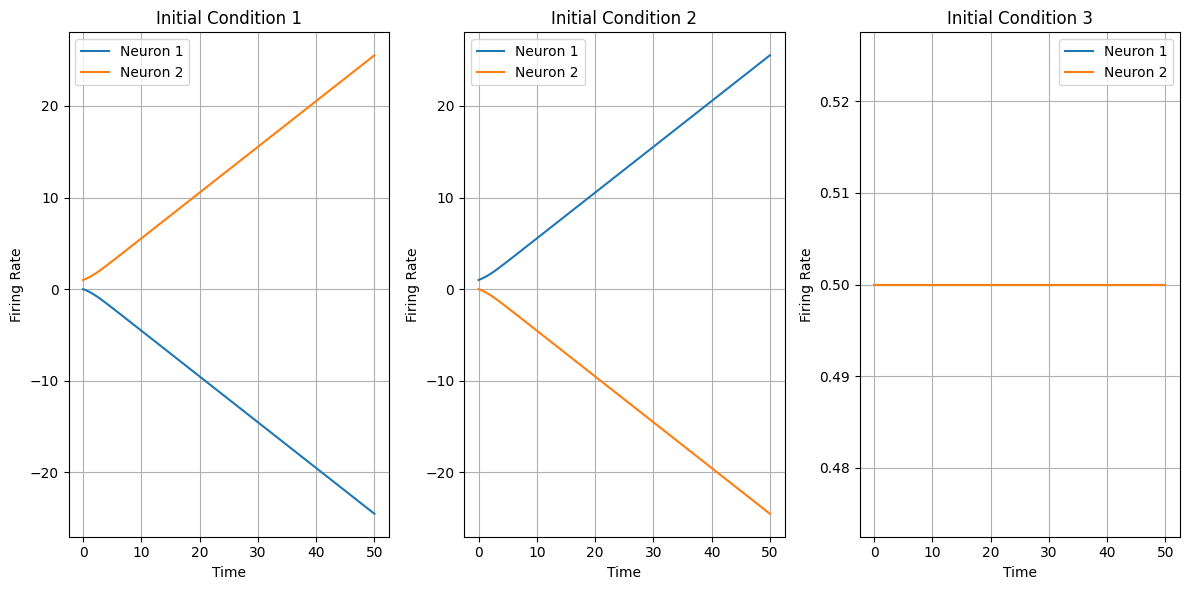

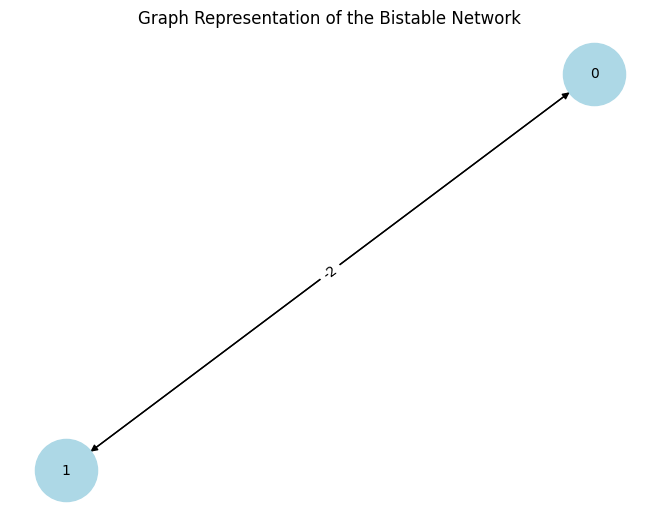

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import networkx as nx

# Define the nonlinearity g(x)
def g(x):
    return 1 / (1 + np.exp(-x)) - 0.5

# Define the dynamics of the system
def bistable_dynamics(t, x, W, b):
    return g(W @ x + b)

# Function to simulate the bistable system
def simulate_bistable(W, b, t_span, x0, t_eval):
    sol = solve_ivp(
        fun=lambda t, x: bistable_dynamics(t, x, W, b),
        t_span=t_span,
        y0=x0,
        t_eval=t_eval,
        method="RK45"
    )
    return sol.t, sol.y

# Define W and b for the bistable network
def define_bistable_network():
    # Mutual inhibition: each neuron suppresses the other
    W = np.array([[0, -2],  # Neuron 1 inhibits Neuron 2
                  [-2,  0]])  # Neuron 2 inhibits Neuron 1
    b = np.array([1, 1])  # Slight bias to push activation
    return W, b

# Simulate and plot the bistable network
def simulate_and_plot_bistable(t_span=(0, 50), t_eval=np.linspace(0, 50, 1000)):
    W, b = define_bistable_network()
    initial_conditions = [np.array([0, 1]), np.array([1, 0]), np.array([0.5, 0.5])]

    plt.figure(figsize=(12, 6))
    for i, x0 in enumerate(initial_conditions):
        # Simulate dynamics
        t, x = simulate_bistable(W, b, t_span, x0, t_eval)

        # Plot the dynamics
        plt.subplot(1, len(initial_conditions), i + 1)
        plt.plot(t, x[0], label="Neuron 1")
        plt.plot(t, x[1], label="Neuron 2")
        plt.title(f"Initial Condition {i+1}")
        plt.xlabel("Time")
        plt.ylabel("Firing Rate")
        plt.legend()
        plt.grid()
    plt.tight_layout()
    plt.show()

    # Draw the graph representation
    draw_bistable_graph(W)

# Draw the graph representation of the bistable network
def draw_bistable_graph(W):
    G = nx.DiGraph()
    n = W.shape[0]
    for i in range(n):
        for j in range(n):
            if W[i, j] != 0:
                G.add_edge(j, i, weight=W[i, j])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph Representation of the Bistable Network")
    plt.show()

# Simulate and plot the bistable network
simulate_and_plot_bistable()
